In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

Data directories

In [2]:
train_dir = "My Drive/train_set"
test_dir = "My Drive/test_data"

Data augmentation and generators

In [3]:
img_size = 48
batch_size = 64

train_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_datagen = ImageDataGenerator(horizontal_flip=True)
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 19384 images belonging to 15 classes.
Found 1254 images belonging to 15 classes.


Model architecture

In [4]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(15, activation='softmax'))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile model

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 8,025,487 (30.61 MB)

 Trainable params: 8,020,495 (30.60 MB)

 Non-trainable params: 4,992 (19.50 KB)

Callbacks

Training

In [6]:
ephocs=30
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps
model.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=ephocs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)


Epoch 1/30


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


302/302 ━━━━━━━━━━━━━━━━━━━━ 137s 443ms/step - accuracy: 0.5805 - loss: 1.3227 - val_accuracy: 0.5929 - val_loss: 1.5841
Epoch 2/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.8125 - loss: 0.5599 - val_accuracy: 0.5000 - val_loss: 1.6394
Epoch 3/30


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


302/302 ━━━━━━━━━━━━━━━━━━━━ 117s 388ms/step - accuracy: 0.8180 - loss: 0.5306 - val_accuracy: 0.5773 - val_loss: 1.5837
Epoch 4/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.8906 - loss: 0.3310 - val_accuracy: 0.6579 - val_loss: 1.2518
Epoch 5/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 177s 586ms/step - accuracy: 0.8746 - loss: 0.3687 - val_accuracy: 0.6258 - val_loss: 1.3321
Epoch 6/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 789us/step - accuracy: 0.8281 - loss: 0.2775 - val_accuracy: 0.6842 - val_loss: 1.1925
Epoch 7/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.9116 - loss: 0.2645 - val_accuracy: 0.7870 - val_loss: 0.6947
Epoch 8/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - accuracy: 0.9375 - loss: 0.2531 - val_accuracy: 0.8158 - val_loss: 0.8438
Epoch 9/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 237s 784ms/step - accuracy: 0.9261 - loss: 0.2235 - val_accuracy: 0.8355 - val_loss: 0.5447
Epoch 10/30
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step - accuracy: 0.9688 - loss: 0.1245 - val_a

Save the model

In [10]:
model.save('LeafModel.h5')

Prediction example

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'Potato___healthy'

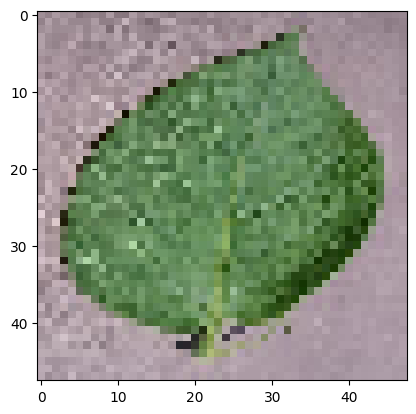

In [11]:
from tensorflow.keras.preprocessing import image

test_img_path = "potatohealthy.JPG"
test_img = image.load_img(test_img_path, target_size=(img_size, img_size))
plt.imshow(test_img)
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
result = model.predict(test_img)
predicted_class = train_generator.class_indices
output = [key for key, value in predicted_class.items() if value == np.argmax(result)][0]
output

In [12]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=steps_per_epoch)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


validation_loss, validation_accuracy = model.evaluate(validation_generator, steps=validation_steps)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

302/302 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.8692 - loss: 0.4438
Training Accuracy: 86.93%
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.8292 - loss: 0.6443
Validation Accuracy: 83.47%
